# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
4 10 7  6  3  7  8  7 4 7 10  7 3 9 3
1  5 8 10 11  6  5  7 6 3  8  4 3 8 4
10 6 8  7  8  7  7  7 4 6  7 10 4 4 0
5  4 4  8  5  5 10  7 3 8  5  6 6 6 3
5  7 8  5  7 10  9 10 8 2  3  6 9"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 4, 10,  7,  6,  3,  7,  8,  7,  4,  7, 10,  7,  3,  9,  3,  1,  5,
        8, 10, 11,  6,  5,  7,  6,  3,  8,  4,  3,  8,  4, 10,  6,  8,  7,
        8,  7,  7,  7,  4,  6,  7, 10,  4,  4,  0,  5,  4,  4,  8,  5,  5,
       10,  7,  3,  8,  5,  6,  6,  6,  3,  5,  7,  8,  5,  7, 10,  9, 10,
        8,  2,  3,  6,  9])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]
[0.014, 0.014, 0.014, 0.11, 0.123, 0.11, 0.123, 0.192, 0.137, 0.041, 0.11, 0.014]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.014,  0.028,  0.042,  0.152,  0.275,  0.385,  0.508,  0.7  ,
        0.837,  0.878,  0.988,  1.002])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.014,0.014
1,1,1,0.014,0.028
2,1,2,0.014,0.042
3,8,3,0.110,0.152
4,9,4,0.123,0.275
5,8,5,0.110,0.385
6,9,6,0.123,0.508
7,14,7,0.192,0.700
8,10,8,0.137,0.837
9,3,9,0.041,0.878


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0,  1,  2, 24, 36, 40, 54, 98, 80, 27, 80, 11])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

453
73


6.2054794520547949

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.00000000e+00,   6.20547945e+00,   3.85079752e+01,
         2.38960449e+02,   1.48286416e+03,   9.20188305e+03,
         5.71020962e+04,   3.54345885e+05,   2.19888611e+06,
         1.36451425e+07,   8.46746517e+07,   5.25446811e+08])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([       1,        1,        2,        6,       24,      120,
            720,     5040,    40320,   362880,  3628800, 39916800])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.00201834,  0.00201834,  0.00201834,  0.00201834,  0.00201834,
        0.00201834,  0.00201834,  0.00201834,  0.00201834,  0.00201834,
        0.00201834,  0.00201834])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.00201834,  0.01252477,  0.03886111,  0.08038394,  0.12470522,
        0.15477114,  0.16007152,  0.14190293,  0.11007197,  0.07589437,
        0.0470961 ,  0.02656853])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(12, array(73)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  0.14733888,   0.91430842,   2.83686105,   5.86802765,
         9.10348126,  11.29829318,  11.68522103,  10.35891414,
         8.0352536 ,   5.54028901,   3.43801496,   1.93950284])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 0.85266112,  0.08569158, -1.83686105,  2.13197235, -0.10348126,
       -3.29829318, -2.68522103,  3.64108586,  1.9647464 , -2.54028901,
        4.56198504, -0.93950284])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  7.27030978e-01,   7.34304719e-03,   3.37405852e+00,
         4.54530609e+00,   1.07083706e-02,   1.08787379e+01,
         7.21041195e+00,   1.32575063e+01,   3.86022840e+00,
         6.45306828e+00,   2.08117075e+01,   8.82665582e-01])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([  4.93441350e+00,   8.03125843e-03,   1.18936334e+00,
         7.74588389e-01,   1.17629402e-03,   9.62865604e-01,
         6.17053964e-01,   1.27981621e+00,   4.80411521e-01,
         1.16475300e+00,   6.05340805e+00,   4.55098886e-01])

In [16]:
abs_Ni_2_Ni.sum()

17.920980018096632

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

7.9604900090483159

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,0.147339,0.002018,1.000000e+00,0.002018,0,0.852661,0.727031,4.934413,1,0
1,0.914308,0.012525,6.205479e+00,0.002018,1,0.085692,0.007343,0.008031,1,1
2,2.836861,0.038861,3.850798e+01,0.002018,2,-1.836861,3.374059,1.189363,2,2
3,5.868028,0.080384,2.389604e+02,0.002018,24,2.131972,4.545306,0.774588,6,3
4,9.103481,0.124705,1.482864e+03,0.002018,36,-0.103481,0.010708,0.001176,24,4
5,11.298293,0.154771,9.201883e+03,0.002018,40,-3.298293,10.878738,0.962866,120,5
6,11.685221,0.160072,5.710210e+04,0.002018,54,-2.685221,7.210412,0.617054,720,6
7,10.358914,0.141903,3.543459e+05,0.002018,98,3.641086,13.257506,1.279816,5040,7
8,8.035254,0.110072,2.198886e+06,0.002018,80,1.964746,3.860228,0.480412,40320,8
9,5.540289,0.075894,1.364514e+07,0.002018,27,-2.540289,6.453068,1.164753,362880,9


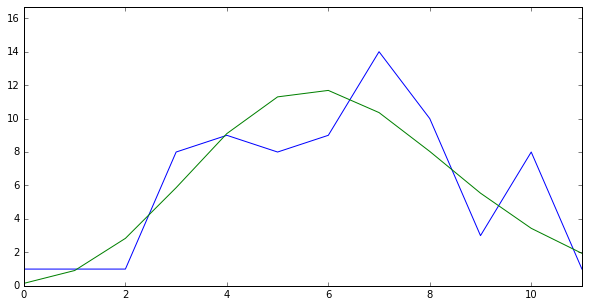

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()